In [1]:
import pandas as pd
from preprocess import load_data_year
import seaborn as sns
import matplotlib.pyplot as plt
from analysis import aggregate_by_country

In [2]:
# Load data
year = 1994
data = load_data_year(year)

# Data analysis
In this section we will perform a general analysis on the data

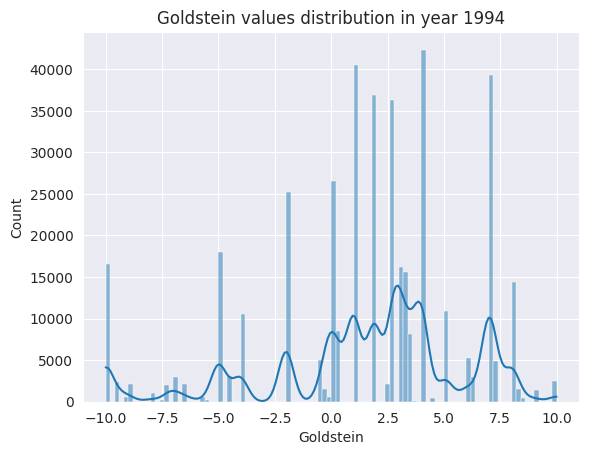

In [3]:
sources = ['USA', 'DEU', 'FRA', 'GBR', 'JPN', 'CHN', 'IND', 'BRA', 'RUS', 'IRN']
# Analyze the distribution of the goldstein values
#sns.boxplot(data=data, x='Goldstein')
# Plot goldstein values distribution
sns.histplot(data, x='Goldstein', bins=100, kde=True)
plt.title(f'Goldstein values distribution in year {year}');

<Figure size 1000x500 with 0 Axes>

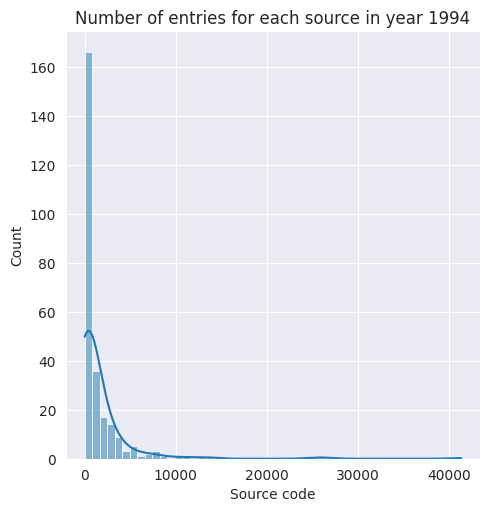

In [4]:
# Count the entries for each source
source_counts = data['Source code'].value_counts()
# Plot the source counts
plt.figure(figsize=(10, 5))
sns.displot(source_counts, bins=50, kde=True)
plt.title(f'Number of entries for each source in year {year}');

## Analysis on aggregated data

In [5]:
def aggregated_barplot(data, x, y, k):
    data_aggregated = aggregate_by_country(data, x)
    top_k = data_aggregated.sort_values(y, ascending=False).head(k)
    worst_k = data_aggregated.sort_values(y, ascending=True).head(k)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.barplot(data=top_k, x=x, y=y)
    # Verical rotation of the x labels
    plt.xticks(rotation=90)
    plt.title(f'Top {k} {x} in year {year}')
    plt.subplot(1, 2, 2)
    sns.barplot(data=worst_k, x=x, y=y)
    plt.xticks(rotation=90)
    plt.title(f'Worst {k} {x} in year {year}');

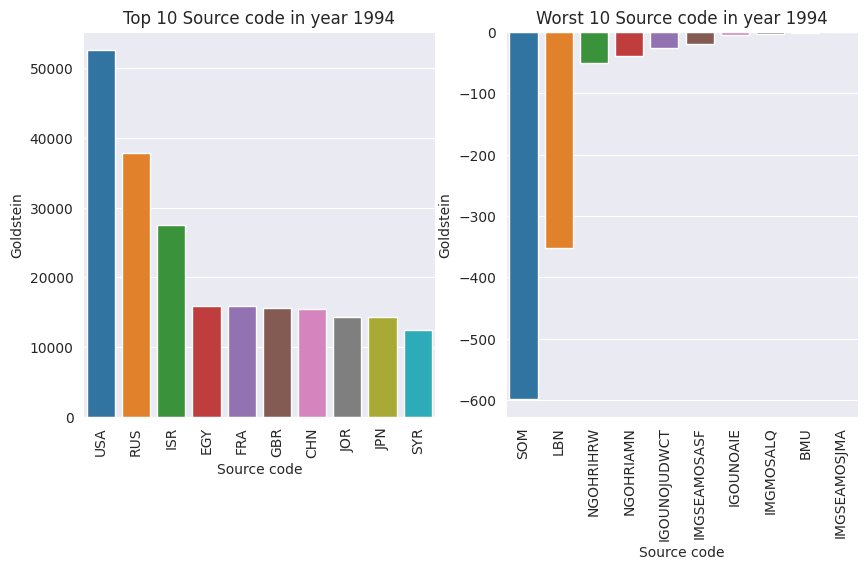

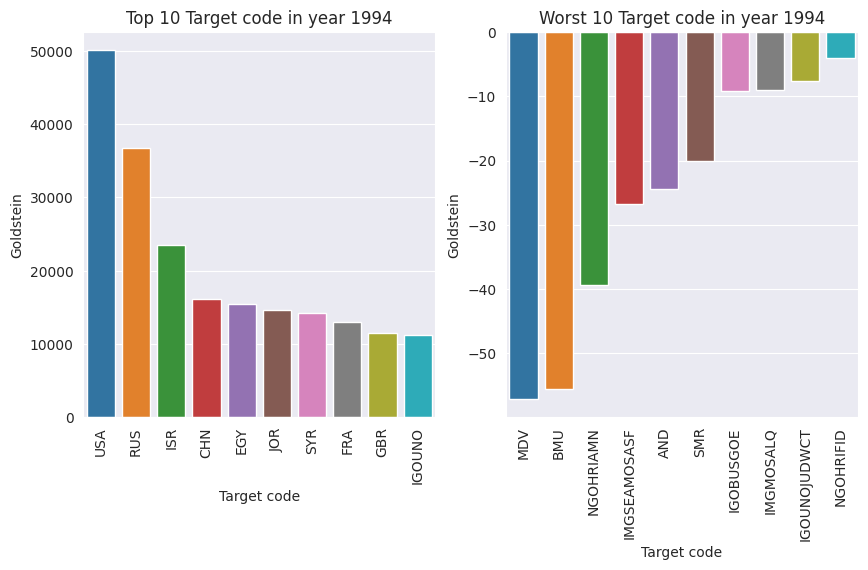

In [13]:
k = 10
self_include = True
data_aggregated_source = aggregate_by_country(data, 'Source code', self_include)
data_aggregated_target = aggregate_by_country(data, 'Target code', self_include)
aggregated_barplot(data, 'Source code', 'Goldstein', k)
aggregated_barplot(data, 'Target code', 'Goldstein', k)

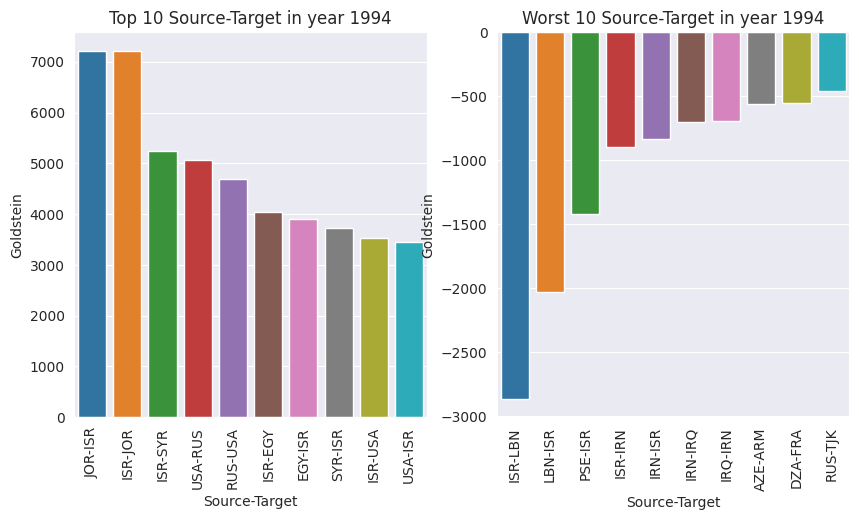

In [14]:
data_aggregated_source_target = aggregate_by_country(data, ['Source code', 'Target code'], self_include)
# Make pairs aggregation
data_aggregated_source_target['Source-Target'] = data_aggregated_source_target['Source code'] + '-' + data_aggregated_source_target['Target code']
aggregated_barplot(data_aggregated_source_target, 'Source-Target', 'Goldstein', k)

## Best frienships

In [ ]:
# Get the best friendships
